In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import osmnx as ox
import matplotlib.cm as cm
import matplotlib.colors as colors

# data: ODroutes, images lat lon, income

In [2]:
OD=pd.read_pickle('ODroutes.pkl')
imgs=pd.read_pickle('imglonlat.pkl')
income=pd.read_pickle('BostonIncomeTracts.pkl')

In [3]:
income=pd.read_pickle('BostonIncomeTracts.pkl')
income.columns
income.to_csv('BostonIncomeTracts.csv')

In [4]:
OD=gpd.GeoDataFrame(OD,geometry='route_geo')
imgs=gpd.GeoDataFrame(imgs,geometry='Points')
income=gpd.GeoDataFrame(income,geometry='geometry')

In [5]:
OD.columns

Index(['routes', 'Freq', 'orig', 'orig_centroid', 'dest', 'dest_centroid',
       'orig_nodes', 'dest_nodes', 'replace', 'network_routes', 'route_geo',
       'lengths'],
      dtype='object')

In [6]:
OD=OD.set_crs('EPSG:4326')

In [7]:
OD.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
OD[['routes', 'Freq', 'orig',  'dest',
       'orig_nodes', 'dest_nodes', 'replace','route_geo',
       'lengths']].to_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston\OD\OD.shp',crs='EPSG:4326')

KeyboardInterrupt: 

In [9]:
G=ox.io.load_graphml('BostonGraph.graphml')

# plot functions

In [ ]:
def weightPlot(df):
    fig, ax = plt.subplots()
    fig.set_size_inches((9, 7))

    n_bins = int(np.rint(np.sqrt(len(df['Freq']))))
    logBins = np.logspace(np.log10(min(df['Freq'])+0.001), np.log10(max(df['Freq'])),num=n_bins)
    logBinDensity, binedges = np.histogram(df['Freq'], bins=logBins, density=True)


    ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=r'$weight$')

    ax.legend(fontsize=10)


    ax.set_xlabel('weight, $w$',fontsize=10)
    ax.set_ylabel('$P(w)$',fontsize=10) 
    plt.title('Data weighted degree distribution')

In [ ]:
def lengthPlot(df):
    fig, ax = plt.subplots()
    fig.set_size_inches((9, 7))

    n_bins = int(np.rint(np.sqrt(len(OD['lengths']))))
    logBins = np.logspace(np.log10(min(OD['lengths'])+0.001), np.log10(max(OD['lengths'])),num=n_bins)
    logBinDensity, binedges = np.histogram(OD['lengths'], bins=logBins, density=True)


    ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=r'$length$')

    ax.legend(fontsize=10)


    ax.set_xlabel('length, $w$',fontsize=10)
    ax.set_ylabel('$P(l)$',fontsize=10) 
    plt.title('Length distribution')

# OD Routes

In [10]:
OD.head()

routes  Freq         orig               orig_centroid  \
0  25025070101,25025030300  2404  25025070101  POINT (-71.05754 42.35277)   
1  25025050400,25025030300    21  25025050400  POINT (-71.03790 42.36822)   
2  25025981700,25025030300   616  25025981700  POINT (-71.06715 42.35474)   
3  25025981300,25025030300   288  25025981300  POINT (-71.01360 42.36370)   
4  25025070300,25025030300   319  25025070300  POINT (-71.07036 42.34841)   

          dest               dest_centroid  orig_nodes  dest_nodes  \
0  25025030300  POINT (-71.05565 42.36023)   527724553  1196431205   
1  25025030300  POINT (-71.05565 42.36023)    61350590  1196431205   
2  25025030300  POINT (-71.05565 42.36023)    61353360  1196431205   
3  25025030300  POINT (-71.05565 42.36023)  2079414430  1196431205   
4  25025030300  POINT (-71.05565 42.36023)    61366695  1196431205   

      replace                                     network_routes  \
0  1196431205  [527724553, 61445225, 61445244, 61445038, 6134...   
1  1196431205  [61350590, 61353435, 61350605, 61363653, 29384...   
2  1196431205  [61353360, 7707946396, 61470782, 61341207, 613...   
3  1196431205  [2079414430, 2079424122, 61439140, 2079450980,...   
4  1196431205  [61366695, 1185484845, 61352738, 61350429, 613...   

                                           route_geo   lengths  
0  MULTILINESTRING ((-71.05716 42.35270, -71.0576...  3449.234  
1  MULTILINESTRING ((-71.03798 42.36811, -71.0380...  3638.025  
2  MULTILINESTRING ((-71.06912 42.35563, -71.0691...  1617.742  
3  MULTILINESTRING ((-71.01800 42.36604, -71.0179...  5207.112  
4  MULTILINESTRING ((-71.06936 42.34861, -71.0693...  2412.788

In [11]:
len(OD.orig.unique())

180

## weight distribution

In [ ]:
#weightPlot(OD)

## length distribution

In [ ]:
#lengthPlot(OD)

# Income

In [12]:
income.head()

GEOID10 neighbour                                           geometry  \
0  25025010405     White  POLYGON ((-71.08996 42.34392, -71.09020 42.343...   
1  25025010404     White  POLYGON ((-71.08580 42.34333, -71.08505 42.342...   
2  25025010801     White  POLYGON ((-71.07251 42.35545, -71.07230 42.355...   
3  25025010702     White  POLYGON ((-71.07066 42.35185, -71.07045 42.351...   
4  25025010204     White  POLYGON ((-71.10114 42.34776, -71.10087 42.347...   

               tract_centroid  Mean income  
0  POINT (-71.08961 42.33987)        34402  
1  POINT (-71.08864 42.34197)        43827  
2  POINT (-71.07702 42.35412)       212083  
3  POINT (-71.07552 42.35184)       275685  
4  POINT (-71.10334 42.34630)        68490

In [13]:
income.dtypes

GEOID10             object
neighbour           object
geometry          geometry
tract_centroid    geometry
Mean income          int32
dtype: object

In [14]:
len(income['GEOID10'])

171

In [15]:
income_hist=np.histogram(income['Mean income'],bins=15,density=True)
income_hist

(array([3.12227581e-06, 7.28531023e-06, 1.00606665e-05, 1.14483447e-05,
        8.32606884e-06, 4.85687349e-06, 4.50995395e-06, 1.73459767e-06,
        2.08151721e-06, 2.42843674e-06, 1.73459767e-06, 1.04075860e-06,
        0.00000000e+00, 3.46919535e-07, 3.46919535e-07]),
 array([ 22833. ,  39689.8,  56546.6,  73403.4,  90260.2, 107117. ,
        123973.8, 140830.6, 157687.4, 174544.2, 191401. , 208257.8,
        225114.6, 241971.4, 258828.2, 275685. ]))

Text(0, 0.5, 'P(income)')

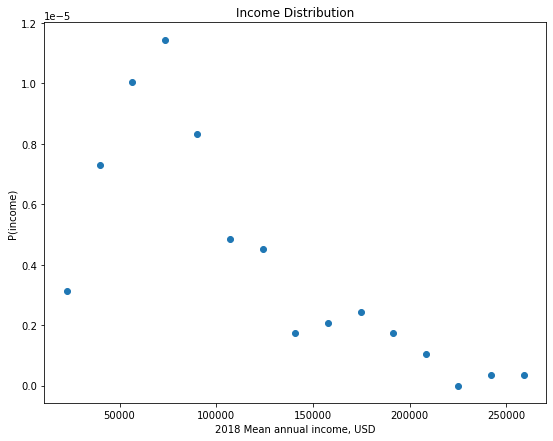

In [16]:
fig,ax=plt.subplots()
fig.set_size_inches((9, 7))
ax.scatter(income_hist[1][:-1],income_hist[0])
ax.set_title('Income Distribution')
ax.set_xlabel('2018 Mean annual income, USD')
ax.set_ylabel('P(income)')

## Rich

In [17]:
rich=income[income['Mean income'].isin(income['Mean income'].sort_values(ascending=False)[0:20])]

In [18]:
richOD=pd.merge(OD, rich, left_on=['orig'],right_on=['GEOID10'])

In [19]:
richOD['Mean income'].describe()

count      3300.000000
mean     196775.318788
std       27515.286950
min      168706.000000
25%      178620.000000
50%      191480.000000
75%      205227.000000
max      275685.000000
Name: Mean income, dtype: float64

In [20]:
#weightPlot(richOD)

In [21]:
#lengthPlot(richOD)

In [22]:
richnodes=[node for l in richOD['network_routes'].tolist() for node in l]

In [23]:
RichNodeFreq=pd.Series(richnodes).value_counts().to_dict()

In [24]:
# parsing street segments from routes
def segment(routes):
    '''
    for each route [A-B-C], parse into [A-B,B-C]
    input list of routes, each route is a list of nodes
    '''
    segmented_routes=[]
    for traj in routes:
        path_segments=[[traj[i-1],traj[i]] for i in range(1,len(traj))]
    
        segmented_routes.append(path_segments)
     
    return segmented_routes
    
    

In [25]:
richRoutes=segment(richOD['network_routes'])

In [35]:
inputEdges=[]
for path in richRoutes:
    for edge in path:
        inputEdges.append(edge)

len(inputEdges)

228209

In [38]:
temp=pd.DataFrame(pd.Series(inputEdges).value_counts(),columns=['edge_counts']).reset_index()
temp.head()

index  edge_counts
0    [4260960996, 61450302]          373
1  [1047223939, 1047219387]          321
2      [61450302, 61450263]          311
3      [61450281, 61452326]          311
4      [61450263, 61389572]          311

In [44]:
temp['u']=temp['index'].apply(lambda x: x[0])
temp['v']=temp['index'].apply(lambda x: x[1])

In [45]:
edges=gpd.read_file('BostonGraph',layer='edges')

In [53]:
edges

osmid  oneway lanes       highway maxspeed   length  \
0                 197230699    True     2   residential   25 mph   33.072   
1                 197230701   False         residential   25 mph  278.886   
2                  29989698    True         residential   25 mph   34.493   
3        [8649976, 8644633]   False     2   residential   25 mph  162.666   
4      [426653648, 8651189]   False     2     secondary            94.540   
...                     ...     ...   ...           ...      ...      ...   
16193             825494639    True     2     secondary   25 mph   10.714   
16194             825494640    True     2     secondary   25 mph   14.120   
16195             845755499   False        unclassified            30.750   
16196             857964823    True     1     secondary            27.667   
16197             862519908   False        primary_link            10.914   

             from          to                                       name  \
0        30730954    61441677                                              
1      1102741801    30730954                                              
2       330143703    30730954                                              
3        61356567    61178875       ['Roland Street', 'Crescent Street']   
4        61356798    61178875  ['Cambridge Street', 'Washington Street']   
...           ...         ...                                        ...   
16193  7707946394  7707946392                              Beacon Street   
16194  7707946394  7707946396                             Charles Street   
16195  7890548571  7890548570                                              
16196  8170967568  7998566599                              Columbia Road   
16197  8035909373  8035909372                                              

                  width bridge ref access tunnel junction           u  \
0                                                            30730954   
1                                                            30730954   
2                                                            30730954   
3       ['9.8', '11.0']                                      61178875   
4      ['19.5', '21.3']                                      61178875   
...                 ...    ...  ..    ...    ...      ...         ...   
16193         28.7;18.3                                    7707946392   
16194              19.5                                    7707946394   
16195                                                      7890548570   
16196                                                      7998566599   
16197                                                      8035909372   

                v  key                                           geometry  
0        61441677    0  LINESTRING (-71.02182 42.36761, -71.02178 42.3...  
1      1102741801    0  LINESTRING (-71.02443 42.36668, -71.02429 42.3...  
2       330143703    0  LINESTRING (-71.02189 42.36791, -71.02187 42.3...  
3        61356567    0  LINESTRING (-71.07962 42.38168, -71.07980 42.3...  
4        61356798    0  LINESTRING (-71.07974 42.38229, -71.07976 42.3...  
...           ...  ...                                                ...  
16193  7707946394    0  LINESTRING (-71.06938 42.35623, -71.06950 42.3...  
16194  7707946396    0  LINESTRING (-71.06938 42.35623, -71.06932 42.3...  
16195  7890548571    0  LINESTRING (-71.00584 42.38808, -71.00578 42.3...  
16196  8170967568    0  LINESTRING (-71.06138 42.32054, -71.06141 42.3...  
16197  8035909373    0  LINESTRING (-71.09823 42.31753, -71.09836 42.3...  

[16198 rows x 19 columns]

In [51]:
targetEdges=gpd.GeoDataFrame(pd.merge(temp,edges,on=['u','v']))

In [54]:
targetEdges

index  edge_counts         u           v      osmid  \
0       [61450281, 61452326]          311  61450281    61452326  519868599   
1       [61389572, 61450281]          311  61389572    61450281  240745677   
2       [61470167, 61470192]          298  61470167    61470192  299911615   
3       [61347642, 61470167]          298  61347642    61470167  299911615   
4       [61420463, 61450370]          291  61420463    61450370    8646654   
...                      ...          ...       ...         ...        ...   
2882    [61342477, 61342741]            1  61342477    61342741    8648494   
2883  [61344274, 1028636639]            1  61344274  1028636639   15090303   
2884    [61343015, 61343461]            1  61343015    61343461  115591995   
2885    [61347637, 61347639]            1  61347637    61347639  279666895   
2886  [61370480, 4786211294]            1  61370480  4786211294   82576273   

      oneway lanes      highway maxspeed   length  ...        to  \
0       True     2      primary           253.683  ...  61452326   
1       True     2      primary           203.528  ...  61450281   
2      False     2    secondary            71.411  ...  61470167   
3      False     2    secondary            75.408  ...  61347642   
4       True     2      primary   25 mph   72.373  ...  61450370   
...      ...   ...          ...      ...      ...  ...       ...   
2882    True     1  residential   25 mph  219.124  ...  61342741   
2883   False     2     tertiary           243.818  ...  61344274   
2884   False     2     tertiary   25 mph   77.276  ...  61343015   
2885   False     2     tertiary            38.998  ...  61347637   
2886   False     2     tertiary   25 mph   22.539  ...  61370480   

                      name width bridge    ref access tunnel junction key  \
0      Commonwealth Avenue  47.0         US 20                          0   
1      Commonwealth Avenue  47.0         US 20                          0   
2        Washington Street  19.8                                        0   
3        Washington Street  19.8                                        0   
4      Commonwealth Avenue               US 20                          0   
...                    ...   ...    ...    ...    ...    ...      ...  ..   
2882         Hudson Street   8.8                                        0   
2883  Avenue Louis Pasteur  24.4                                        0   
2884       Harrison Avenue  23.2                                        0   
2885      Blue Hill Avenue  18.3                                        0   
2886        Medford Street  19.8                                        0   

                                               geometry  
0     LINESTRING (-71.10057 42.34938, -71.10071 42.3...  
1     LINESTRING (-71.09813 42.34909, -71.09928 42.3...  
2     LINESTRING (-71.09948 42.31461, -71.09916 42.3...  
3     LINESTRING (-71.09897 42.31512, -71.09864 42.3...  
4     LINESTRING (-71.12321 42.35210, -71.12408 42.3...  
...                                                 ...  
2882  LINESTRING (-71.06112 42.34812, -71.06115 42.3...  
2883  LINESTRING (-71.10166 42.33929, -71.10191 42.3...  
2884  LINESTRING (-71.07198 42.33749, -71.07203 42.3...  
2885  LINESTRING (-71.07825 42.31589, -71.07827 42.3...  
2886  LINESTRING (-71.06159 42.38078, -71.06170 42.3...  

[2887 rows x 21 columns]

# Poor

In [32]:
poor=income[income['Mean income'].isin(income['Mean income'].sort_values(ascending=True)[0:20])]

In [33]:
poor.head()

GEOID10 neighbour                                           geometry  \
0   25025010405     White  POLYGON ((-71.08996 42.34392, -71.09020 42.343...   
1   25025010404     White  POLYGON ((-71.08580 42.34333, -71.08505 42.342...   
7   25025000703     White  POLYGON ((-71.12126 42.35187, -71.12128 42.351...   
61  25025010300     White  POLYGON ((-71.09321 42.34094, -71.09326 42.340...   
69  25025080801  Hispanic  POLYGON ((-71.09052 42.33566, -71.09241 42.334...   

                tract_centroid  Mean income  
0   POINT (-71.08961 42.33987)        34402  
1   POINT (-71.08864 42.34197)        43827  
7   POINT (-71.12822 42.35133)        43678  
61  POINT (-71.10179 42.33943)        43476  
69  POINT (-71.09621 42.33461)        32940

In [34]:
poor['neighbour'].value_counts()

White       7
Black       7
Hispanic    6
Name: neighbour, dtype: int64

In [35]:
poorOD=pd.merge(OD, poor, left_on=['orig'],right_on=['GEOID10'])

In [36]:
poornodes=[node for l in poorOD['network_routes'].tolist() for node in l]

In [37]:
#weightPlot(poorOD)

In [38]:
#lengthPlot(poorOD)

<AxesSubplot:>

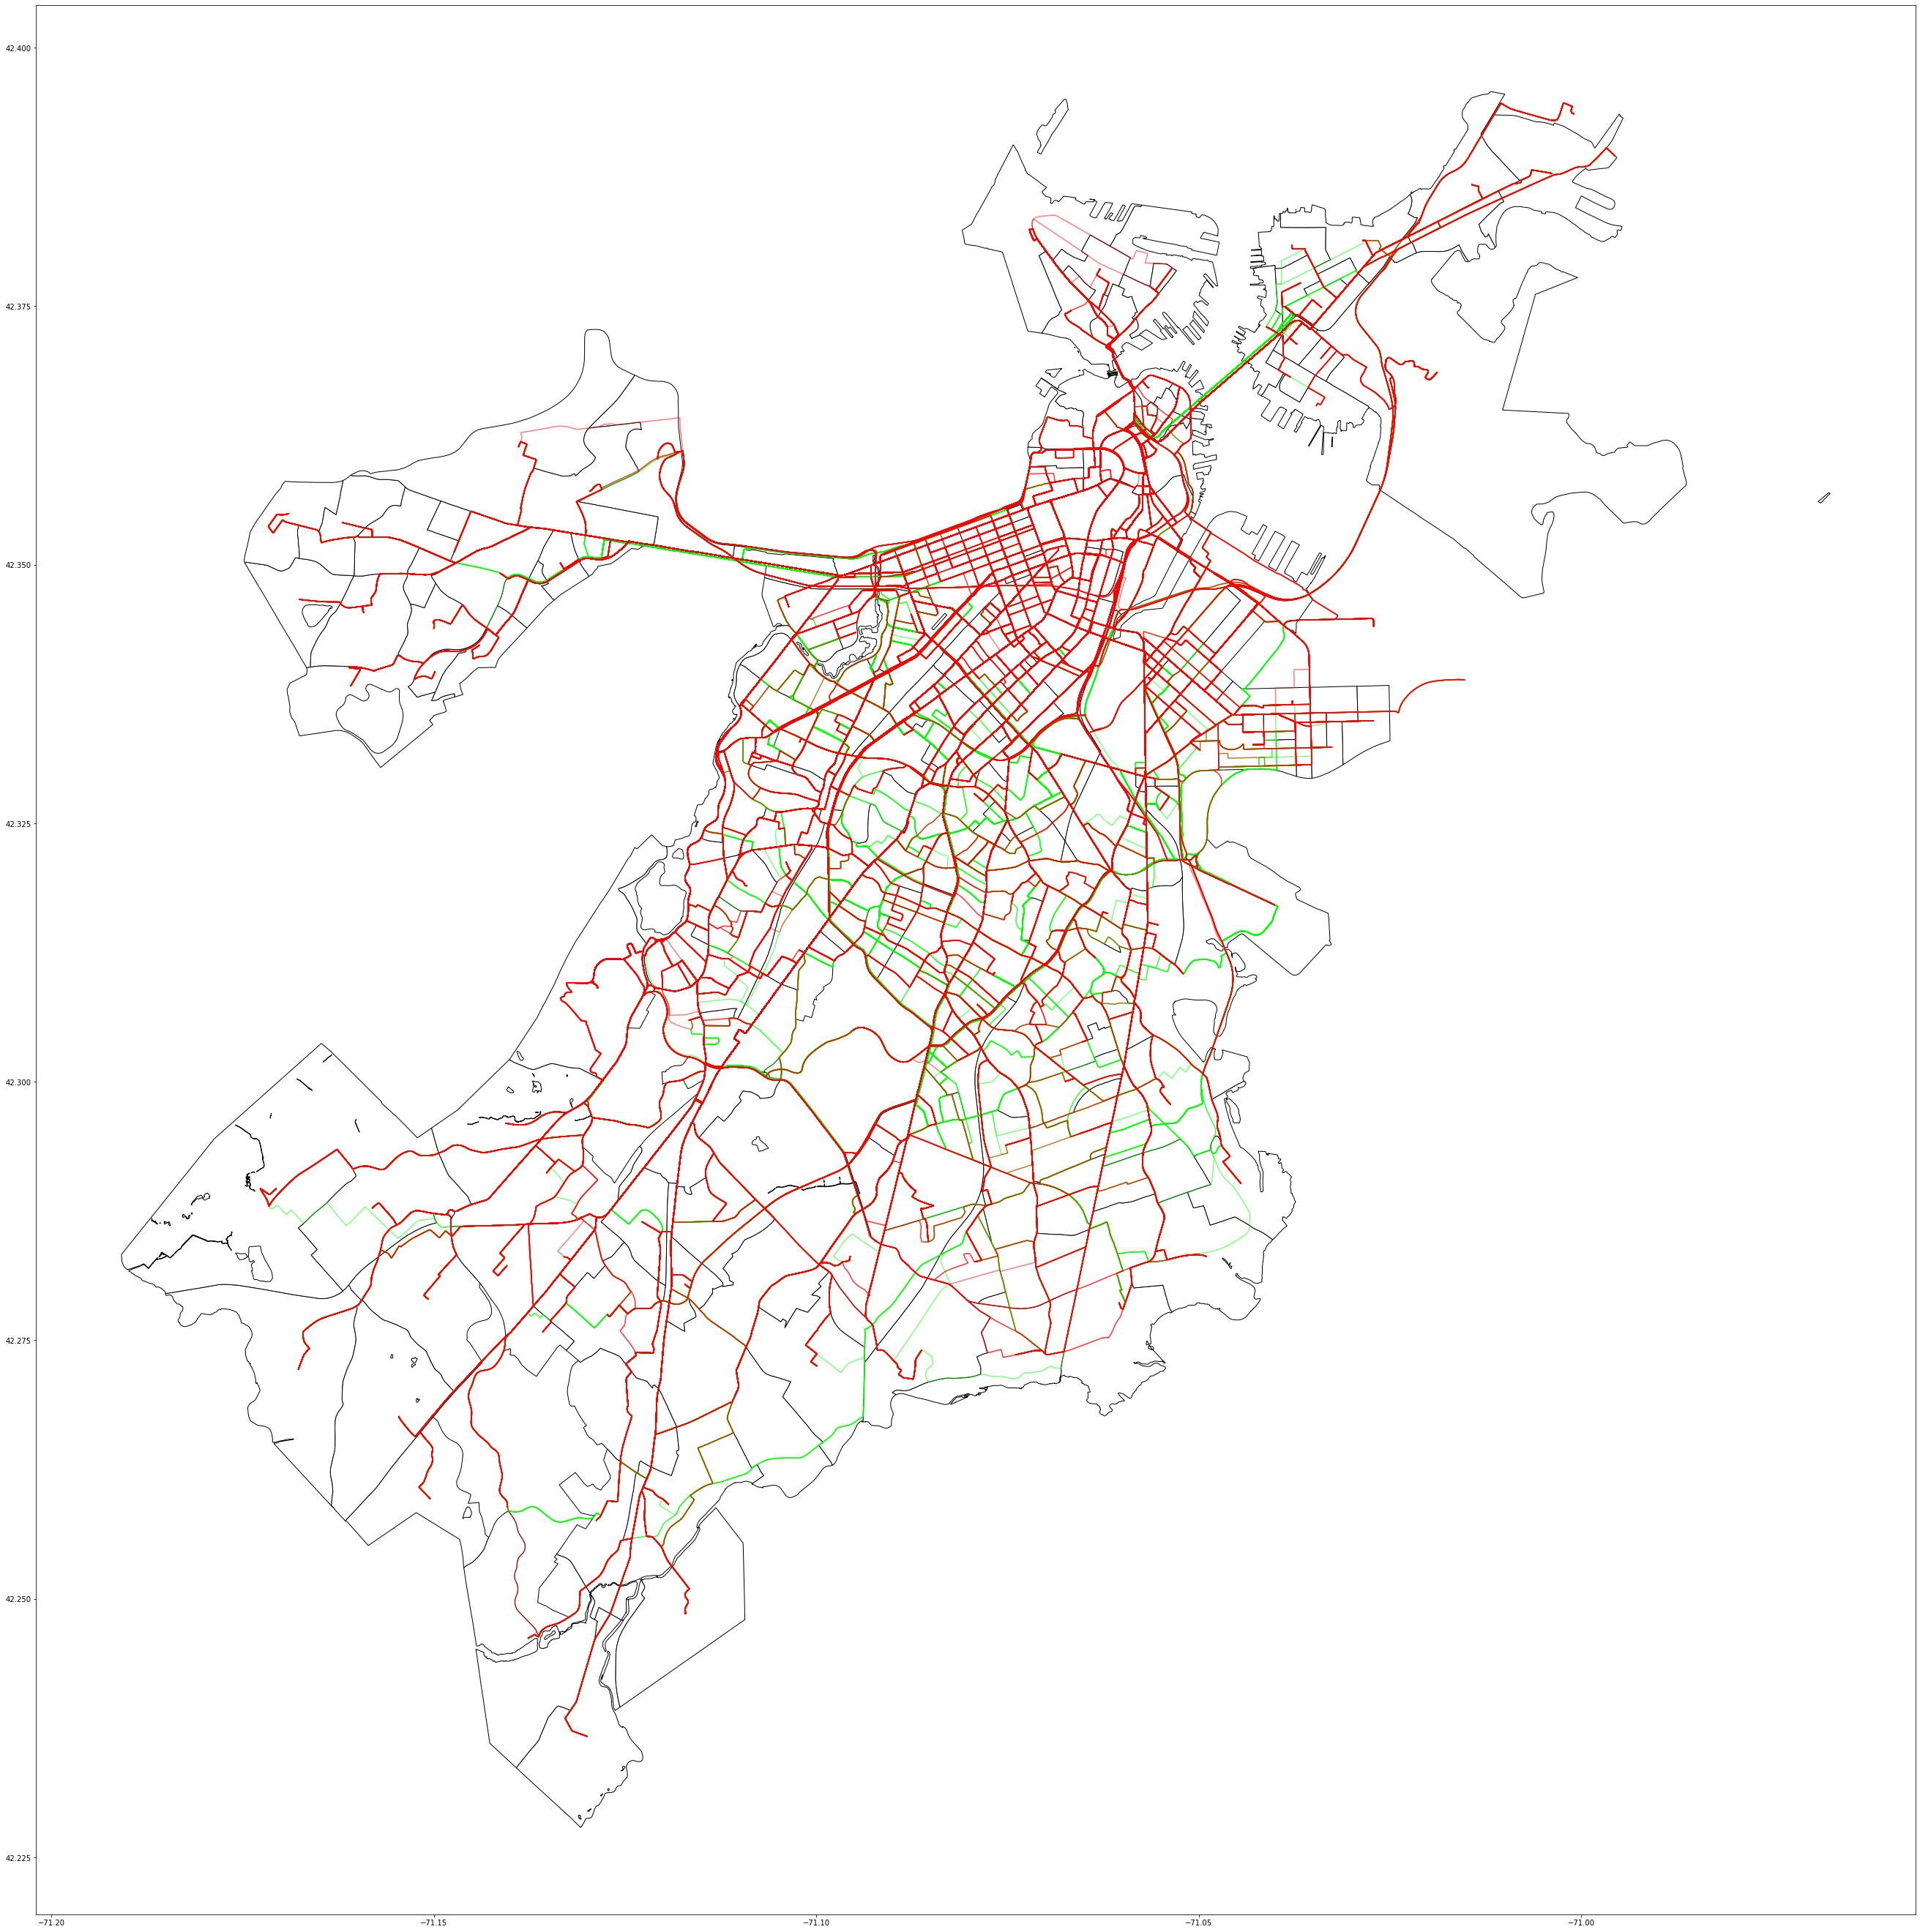

In [39]:
base=income.plot(#column='Mean income', cmap='Greys',
                 figsize=[48,48],legend=True,edgecolor='k',color='w',
                legend_kwds={'label': "Income",'orientation': "horizontal"})
#rich.plot(ax=base,markersize=0.1,color='#ffff00')
poorOD.plot(ax=base,markersize=0.1,color='#00ff00',label='poor',legend=True,alpha=0.5)
richOD.plot(ax=base,markersize=0.1,color='#ff0000',label='rich',legend=True,alpha=0.5)

# Node Demanding

In [40]:
PoorNodeFreq=pd.DataFrame(pd.Series(poornodes).value_counts(),columns=['poor_counts']).reset_index()
RichNodeFreq=pd.DataFrame(pd.Series(richnodes).value_counts(),columns=['rich_counts']).reset_index()

In [41]:
counts=pd.merge(PoorNodeFreq,RichNodeFreq,left_on='index',right_on='index',how='outer')

In [42]:
counts=counts.fillna(0)

In [43]:
counts

index  poor_counts  rich_counts
0       61344723        343.0        123.0
1       61343528        337.0        132.0
2     3060030832        335.0        206.0
3     3097496493        332.0         57.0
4     6234776592        330.0         67.0
...          ...          ...          ...
5106    61356685          0.0          1.0
5107    61367328          0.0          1.0
5108    61345735          0.0          1.0
5109    61356676          0.0          1.0
5110    61355121          0.0          1.0

[5111 rows x 3 columns]

In [44]:
counts['combined']=counts['poor_counts']+counts['rich_counts']

In [45]:
counts

index  poor_counts  rich_counts  combined
0       61344723        343.0        123.0     466.0
1       61343528        337.0        132.0     469.0
2     3060030832        335.0        206.0     541.0
3     3097496493        332.0         57.0     389.0
4     6234776592        330.0         67.0     397.0
...          ...          ...          ...       ...
5106    61356685          0.0          1.0       1.0
5107    61367328          0.0          1.0       1.0
5108    61345735          0.0          1.0       1.0
5109    61356676          0.0          1.0       1.0
5110    61355121          0.0          1.0       1.0

[5111 rows x 4 columns]

In [46]:
counts.dtypes

index            int64
poor_counts    float64
rich_counts    float64
combined       float64
dtype: object

In [47]:
counts['poor_fraction']=counts['poor_counts']/counts['combined']

In [48]:
counts['rich_fraction']=counts['rich_counts']/counts['combined']

In [49]:
counts.columns

Index(['index', 'poor_counts', 'rich_counts', 'combined', 'poor_fraction',
       'rich_fraction'],
      dtype='object')

In [50]:
# ‘dict’ (default) : dict like {column -> {index -> value}}
np.array(counts[['index','poor_fraction']])

array([[6.13447230e+07, 7.36051502e-01],
       [6.13435280e+07, 7.18550107e-01],
       [3.06003083e+09, 6.19223660e-01],
       ...,
       [6.13457350e+07, 0.00000000e+00],
       [6.13566760e+07, 0.00000000e+00],
       [6.13551210e+07, 0.00000000e+00]])

In [51]:
for node in G.nodes:
    G.nodes[node]['poor_fraction']= None

In [52]:
for i in np.array(counts[['index','poor_fraction']]):
    node=int(i[0])
    pfract=i[1]
    G.nodes[node]['poor_fraction']=pfract
    

In [53]:
G.nodes[61344723]

{'y': 42.334084,
 'x': -71.095519,
 'osmid': 61344723,
 'poor_fraction': 0.7360515021459227}

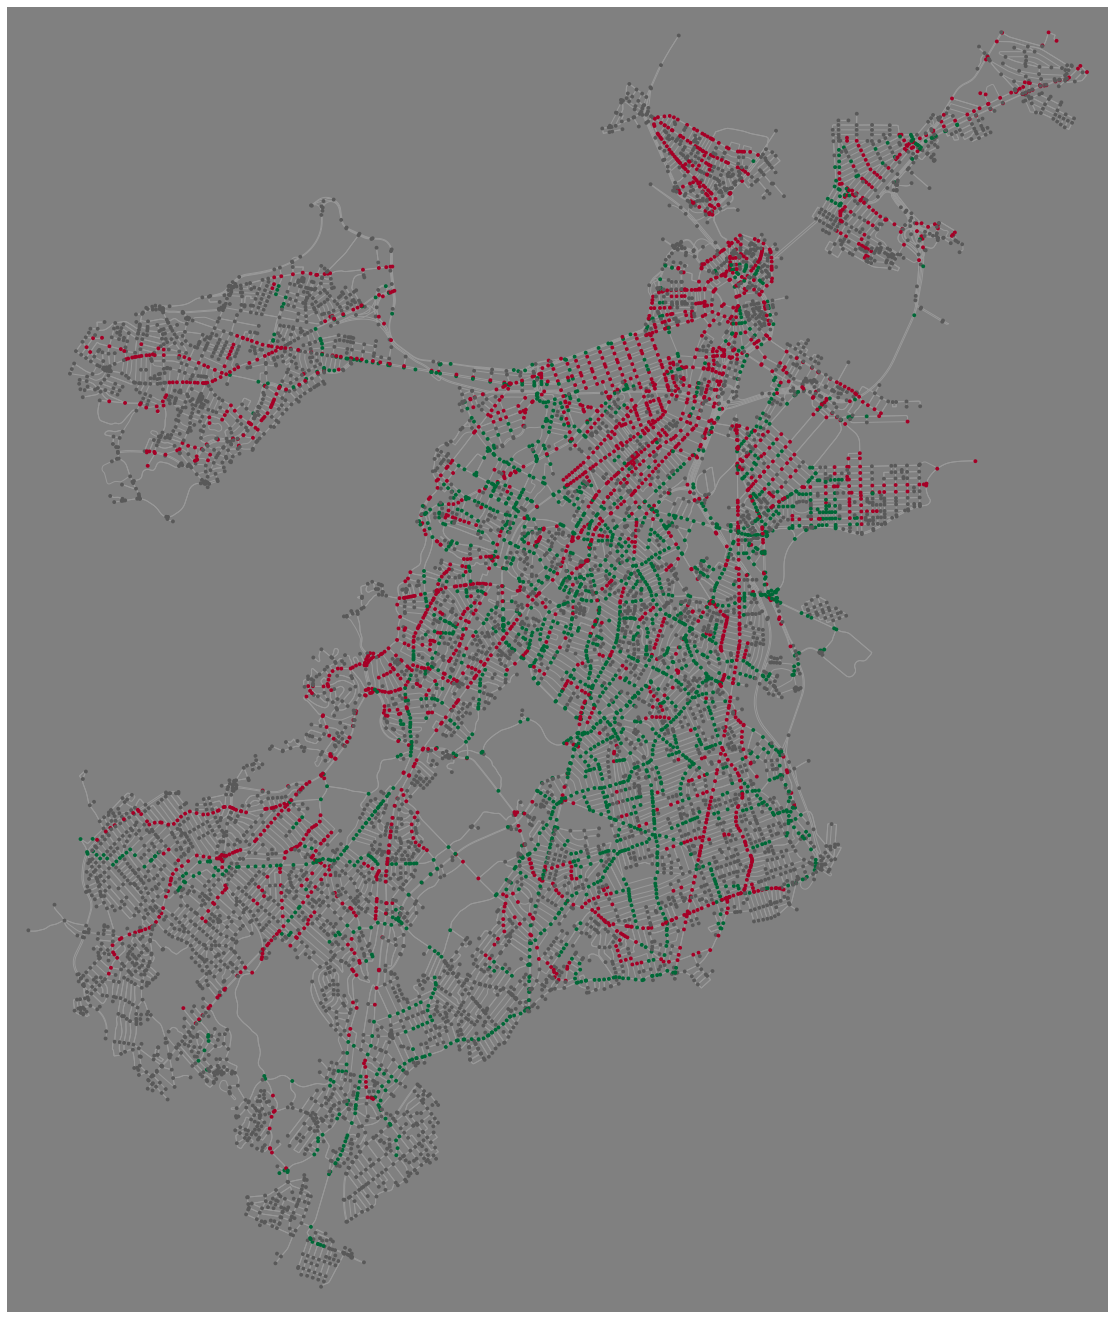

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

In [54]:
nc = ox.plot.get_node_colors_by_attr(G, attr='poor_fraction', cmap='RdYlGn',num_bins=2,na_color='#595959')
ox.plot_graph(G,node_color=nc,figsize=[24,24],bgcolor='#808080')

In [55]:
ox.io.save_graphml(G,'BostonGraph.graphml')

In [56]:
imgs.head()

path  \
0  D:\Berkeley\CE263N\Project idea\4weixin\Boston...   
0  D:\Berkeley\CE263N\Project idea\4weixin\Boston...   
0  D:\Berkeley\CE263N\Project idea\4weixin\Boston...   
0  D:\Berkeley\CE263N\Project idea\4weixin\Boston...   
0  D:\Berkeley\CE263N\Project idea\4weixin\Boston...   

                                                name img_type  \
0  103477482_0-42.349903626712845,-71.08304276122...    Alley   
0  103477482_1-42.349903626712845,-71.08304276122...    Alley   
0  104166949_0-42.35787702952917,-71.069867192384...    Alley   
0  104166949_1-42.35787702952917,-71.069867192384...    Alley   
0  105262004_0-42.344428207651674,-71.06819520394...    Alley   

                  lat                 lon                      Points  
0  42.349903626712845  -71.08304276122757  POINT (-71.08304 42.34990)  
0  42.349903626712845  -71.08304276122757  POINT (-71.08304 42.34990)  
0   42.35787702952917   -71.0698671923843  POINT (-71.06987 42.35788)  
0   42.35787702952917   -71.0698671923843  POINT (-71.06987 42.35788)  
0  42.344428207651674  -71.06819520394998  POINT (-71.06820 42.34443)

In [57]:
pNodeHist=np.histogram(np.array(counts['poor_fraction']), bins=50,density=False)

In [58]:
pNodeHist

(array([446,  21,  39,  36,  64,  33,  44,  57,  41,  58,  65,  28,  78,
         57,  76,  47,  91,  53,  79, 101, 138, 187, 189, 165, 212, 420,
        143, 121,  95,  74,  84,  78,  56,  76,  80,  35,  49,  54,  51,
         21,  85,  55, 113,  47,  38,  46,  37,  43,  54, 751], dtype=int64),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]))

(-0.01, 1.0)

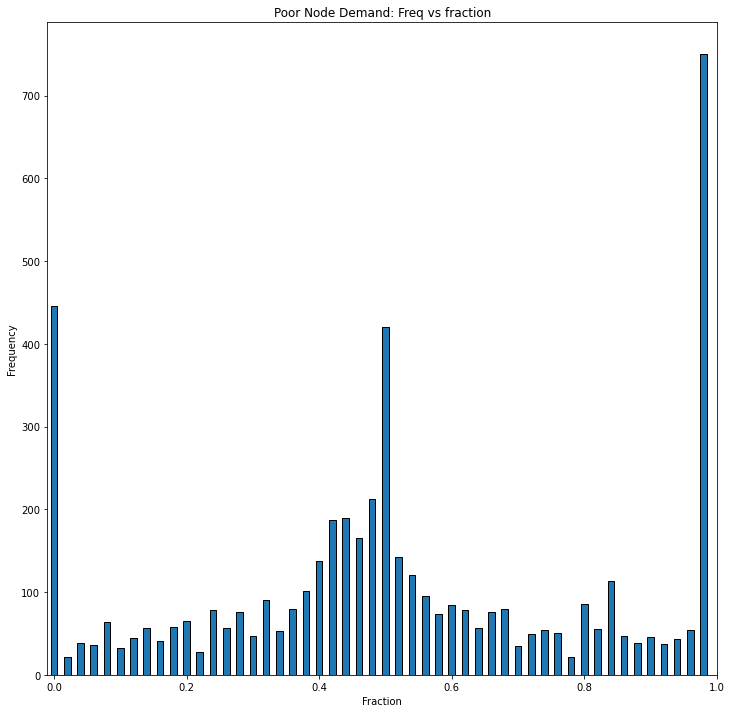

In [59]:
fig,ax=plt.subplots()
fig.set_size_inches((12,12))
ax.bar(pNodeHist[1][:-1],pNodeHist[0],edgecolor='k',width=0.01)
ax.set_title('Poor Node Demand: Freq vs fraction')
ax.set_xlabel('Fraction')
ax.set_ylabel('Frequency')
ax.set_xlim([-0.01, 1])

In [60]:
np.quantile(counts['poor_fraction'],q=[0,0.25,0.5,0.75,1])

array([0.        , 0.33810719, 0.5       , 0.79487179, 1.        ])

In [61]:
# Matching rich/poor nodes to images

In [62]:
edges=gpd.read_file('BostonGraph',layer='edges')

In [63]:
nodes=gpd.read_file('BostonGraph',layer='nodes')

In [64]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [65]:
nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [66]:
imgs=imgs.set_crs(nodes.crs)

In [67]:
imgs=imgs.reset_index()

<AxesSubplot:>

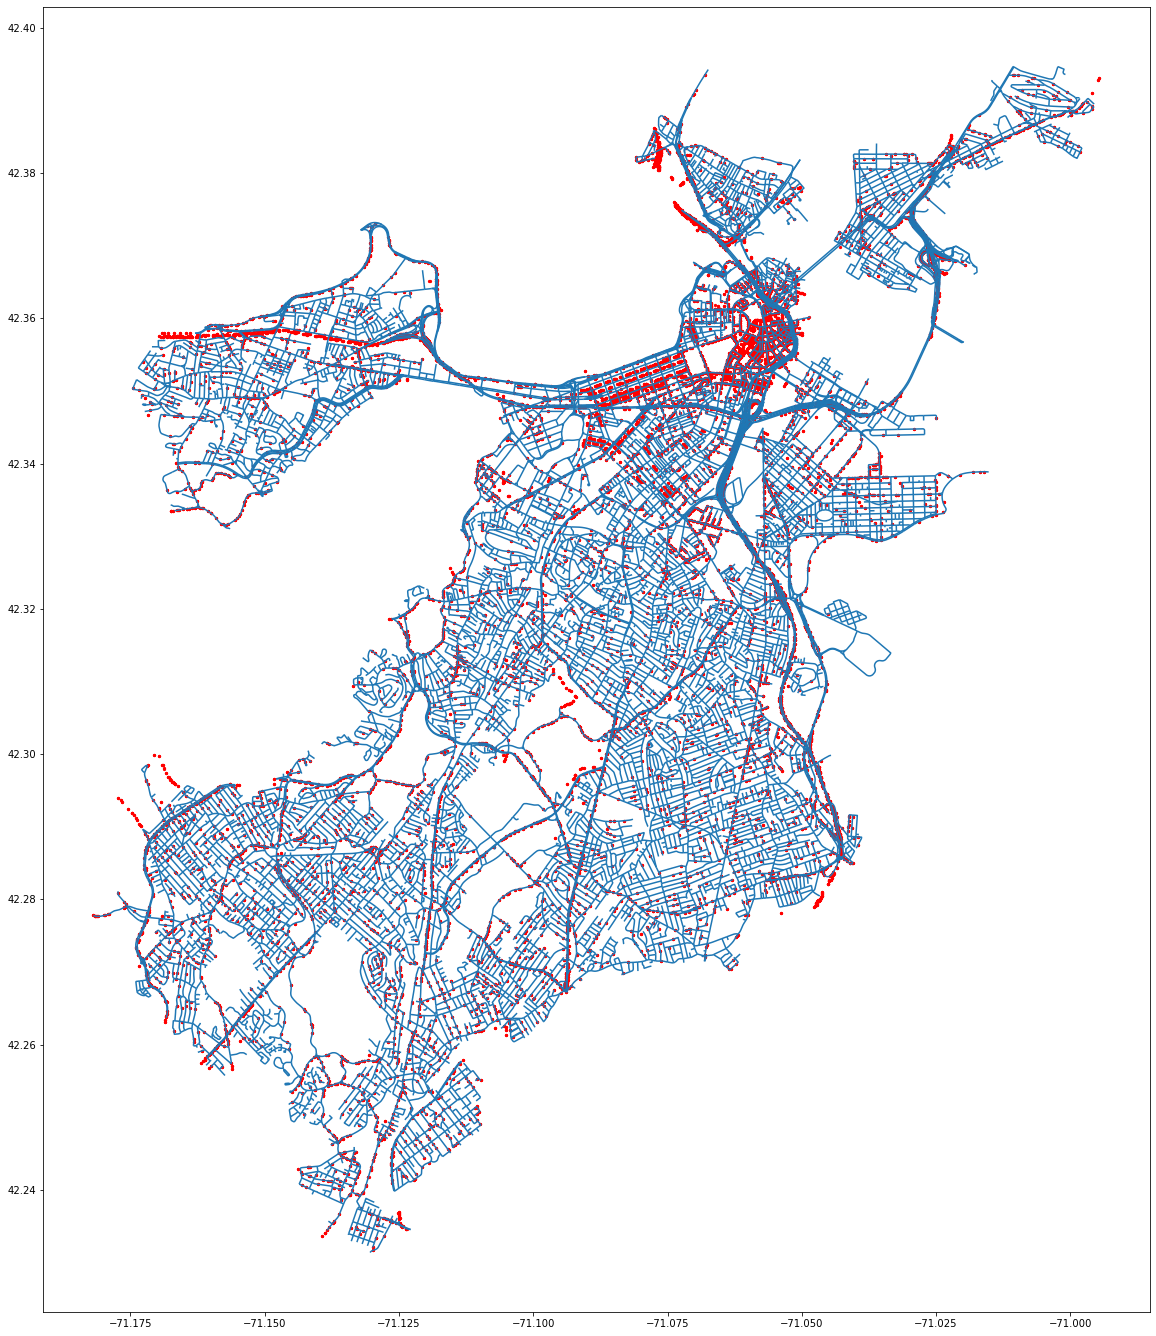

In [68]:
base=edges.plot(figsize=[24,24],markersize=1)
imgs.plot(ax=base,figsize=[24,24],markersize=5,color='red')

<AxesSubplot:>

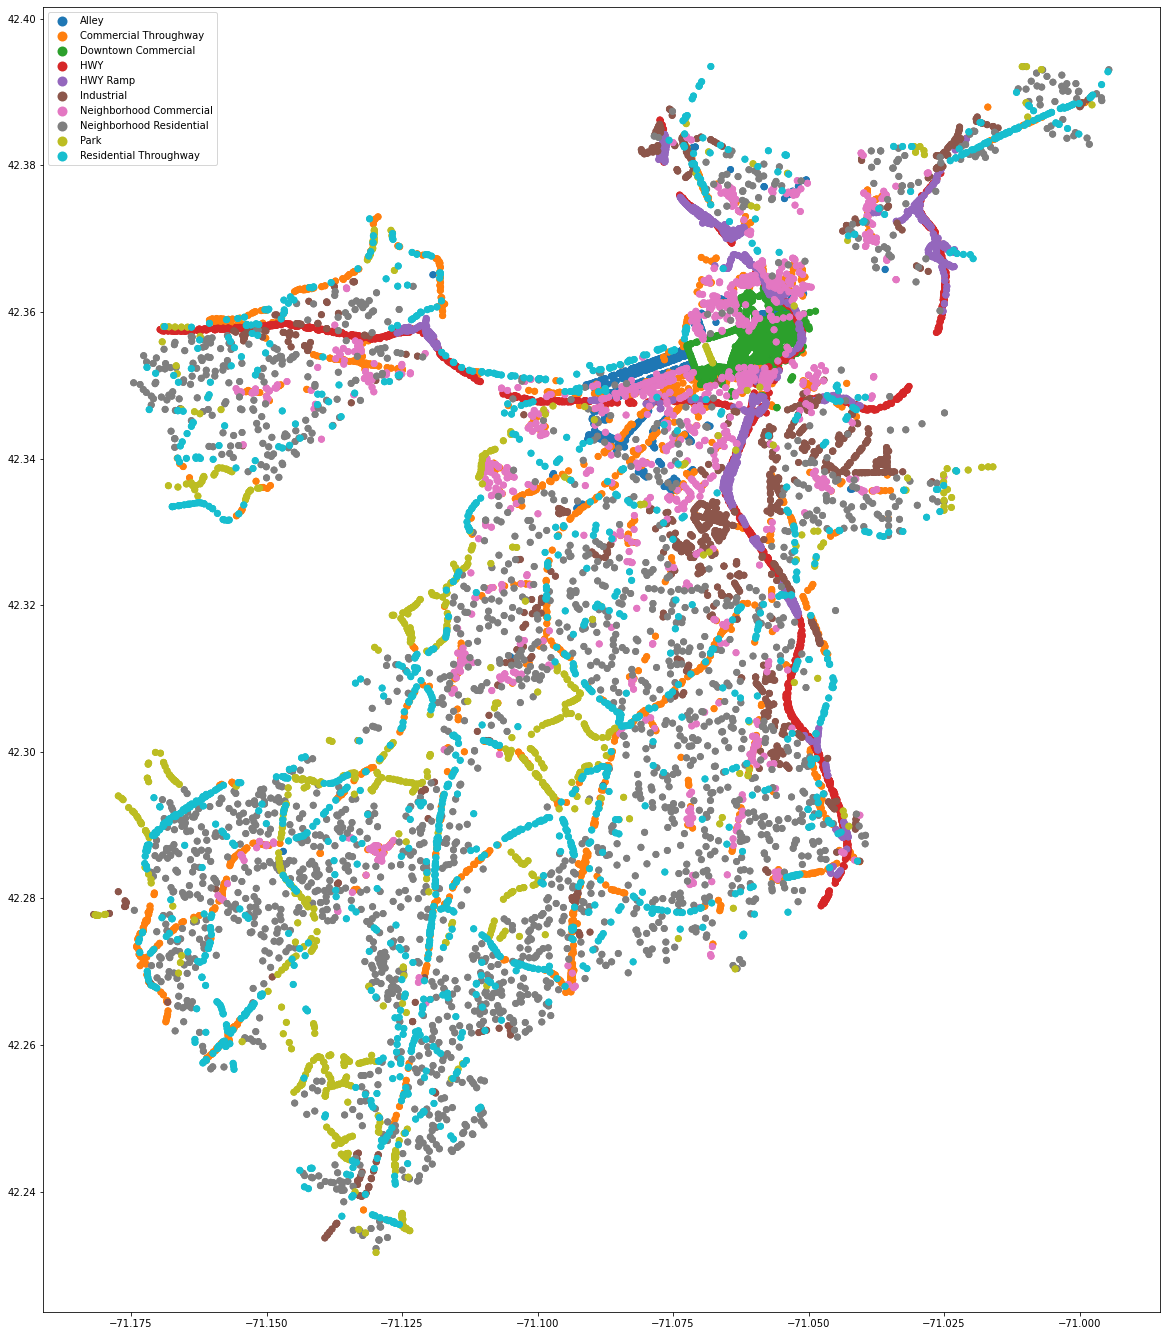

In [69]:
imgs.plot(figsize=[24,24],column='img_type',categorical=True,legend=True)

In [70]:
counts['poor_fraction'].describe()

count    5111.000000
mean        0.531150
std         0.306497
min         0.000000
25%         0.338107
50%         0.500000
75%         0.794872
max         1.000000
Name: poor_fraction, dtype: float64

In [71]:
## define rich/poor nodes
poornodes=nodes[nodes['poor_fraction']>=0.794872]
richnodes=nodes[nodes['poor_fraction']<=0.338107]

In [72]:
# Spatial index to find poor edges
# Returns: ndarray with shape (2, n)
# The first subarray contains input geometry indexes. The second subarray contains tree geometry indexes.

# pooredges
inp, res = edges.sindex.query_bulk(poornodes.geometry, predicate='touches')

In [73]:
pooredges=edges[edges.index.isin(res)]

<AxesSubplot:>

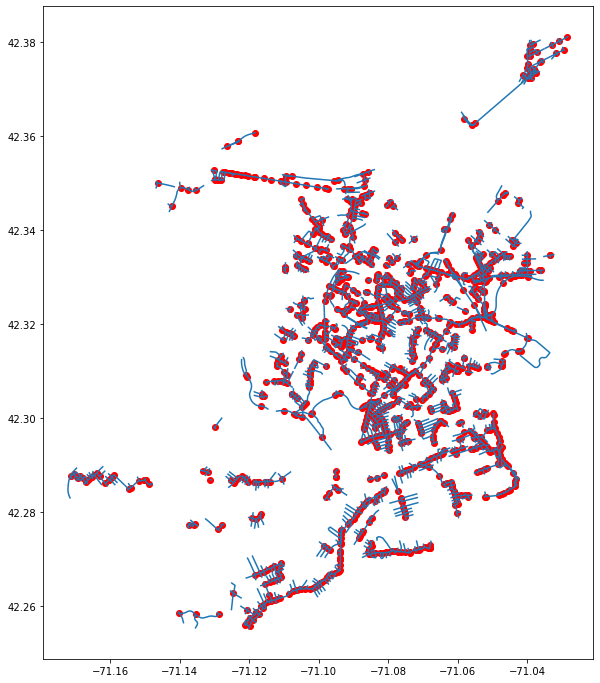

In [74]:
poorN=poornodes.plot(figsize=[12,12],color='red')
pooredges.plot(ax=poorN,figsize=[12,12])

In [75]:
inp, res = edges.sindex.query_bulk(richnodes.geometry, predicate='touches')

In [76]:
richedges=edges[edges.index.isin(res)]

<AxesSubplot:>

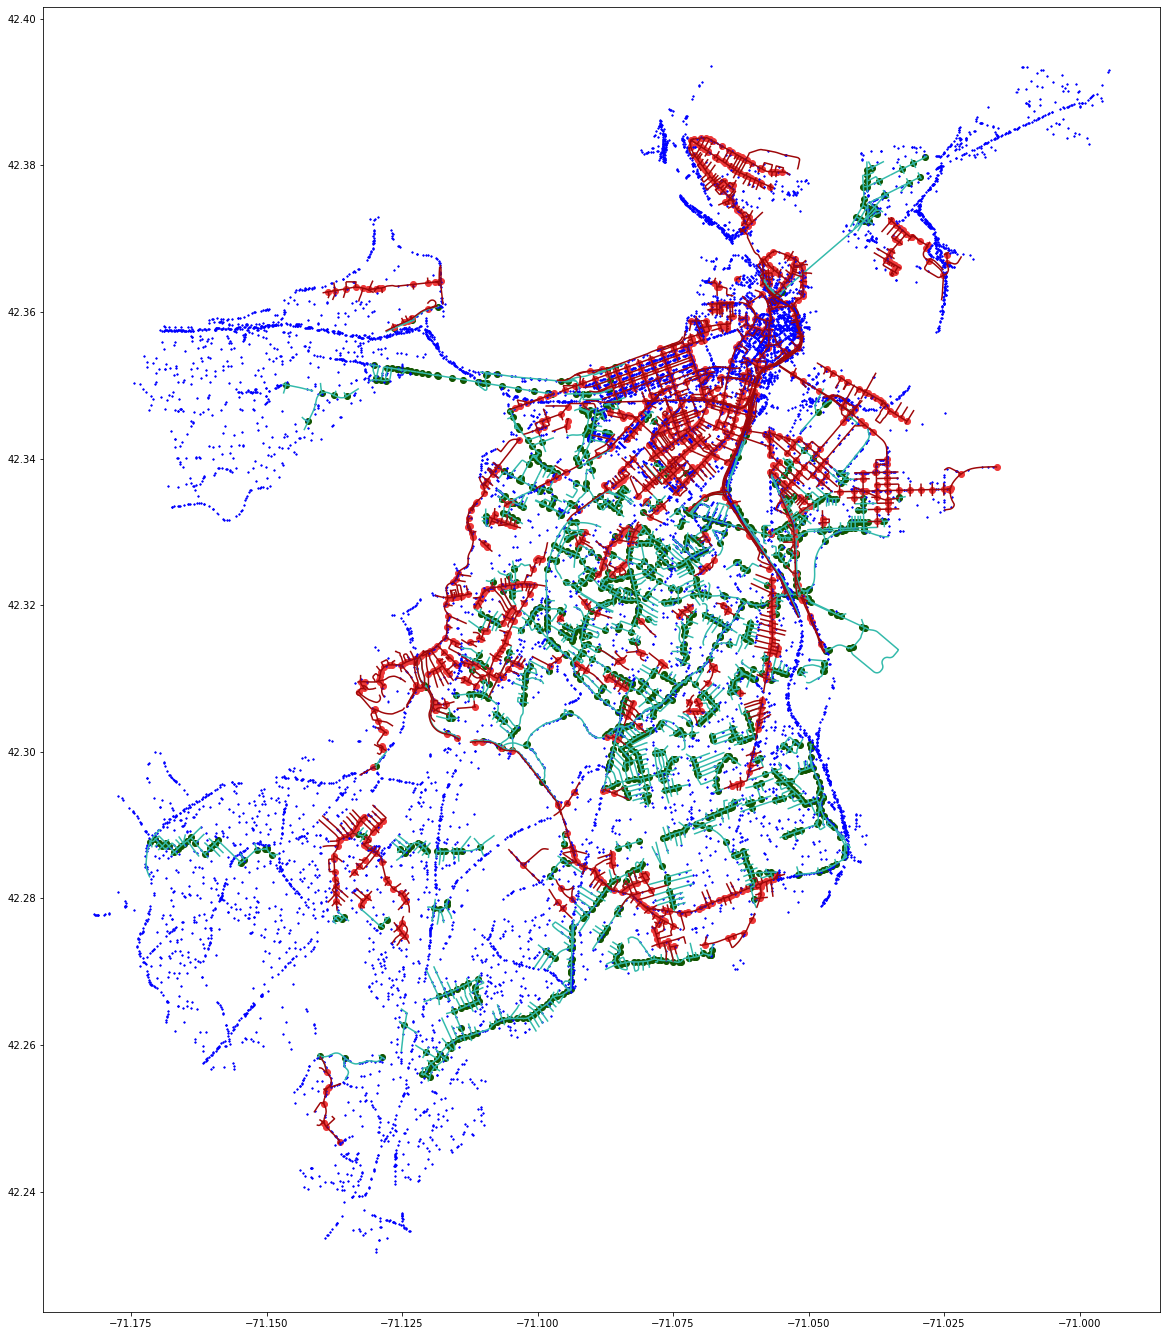

In [77]:
poorN=poornodes.plot(figsize=[24,24], color='#115500')
pooredges.plot(ax=poorN, color='#33baab')
richN=richnodes.plot(ax=poorN,color='#ed3939')
richedges.plot(ax=poorN, color='#9e0709')
imgs.plot(ax=poorN,color='blue',marker='o',markersize=1)

In [78]:
richBuff=richedges.to_crs('EPSG:32619').buffer(10)
poorBuff=pooredges.to_crs('EPSG:32619').buffer(10)

In [79]:
inp, res = richBuff.sindex.query_bulk(imgs.to_crs(richBuff.crs).geometry, predicate='intersects')

In [80]:
richImgs=imgs[imgs.index.isin(inp)]

In [81]:
richImgs.shape

(5469, 7)

In [82]:
inp, res = poorBuff.sindex.query_bulk(imgs.to_crs(richBuff.crs).geometry, predicate='intersects')
poorImgs=imgs[imgs.index.isin(inp)]

In [83]:
# drop overlaps
overlaps=richImgs[richImgs.index.isin(poorImgs.index )]
richImgs=richImgs.drop(overlaps.index)
poorImgs=poorImgs.drop(overlaps.index)

In [84]:
richImgs.img_type.value_counts(normalize=True)

Downtown Commercial         0.205773
Neighborhood Commercial     0.197330
Commercial Throughway       0.143530
HWY Ramp                    0.082859
Residential Throughway      0.082073
Industrial                  0.080110
Neighborhood Residential    0.078343
HWY                         0.067544
Park                        0.049087
Alley                       0.013352
Name: img_type, dtype: float64

In [85]:
poorImgs.img_type.value_counts(normalize=True)

Neighborhood Residential    0.231803
Commercial Throughway       0.181639
Industrial                  0.178361
Residential Throughway      0.151148
Neighborhood Commercial     0.085574
Park                        0.072787
HWY Ramp                    0.053770
HWY                         0.040328
Alley                       0.003279
Downtown Commercial         0.001311
Name: img_type, dtype: float64

In [86]:
richDist=richImgs.img_type.value_counts(normalize=True).reset_index()
poorDist=poorImgs.img_type.value_counts(normalize=True).reset_index()

In [87]:
typeDist=richDist.merge(poorDist, on='index')
richDist=typeDist['img_type_x']
poorDist=typeDist['img_type_y']

In [88]:
np.array(richImgs.img_type.value_counts(normalize=True).reset_index())

array([['Downtown Commercial', 0.205772629098763],
       ['Neighborhood Commercial', 0.1973296681720008],
       ['Commercial Throughway', 0.14353033575495777],
       ['HWY Ramp', 0.08285882583938739],
       ['Residential Throughway', 0.08207343412526998],
       ['Industrial', 0.08010995483997643],
       ['Neighborhood Residential', 0.07834282348321225],
       ['HWY', 0.06754368741409777],
       ['Park', 0.0490869821323385],
       ['Alley', 0.013351659139996074]], dtype=object)

In [89]:
np.array(typeDist['index'])

array(['Downtown Commercial', 'Neighborhood Commercial',
       'Commercial Throughway', 'HWY Ramp', 'Residential Throughway',
       'Industrial', 'Neighborhood Residential', 'HWY', 'Park', 'Alley'],
      dtype=object)

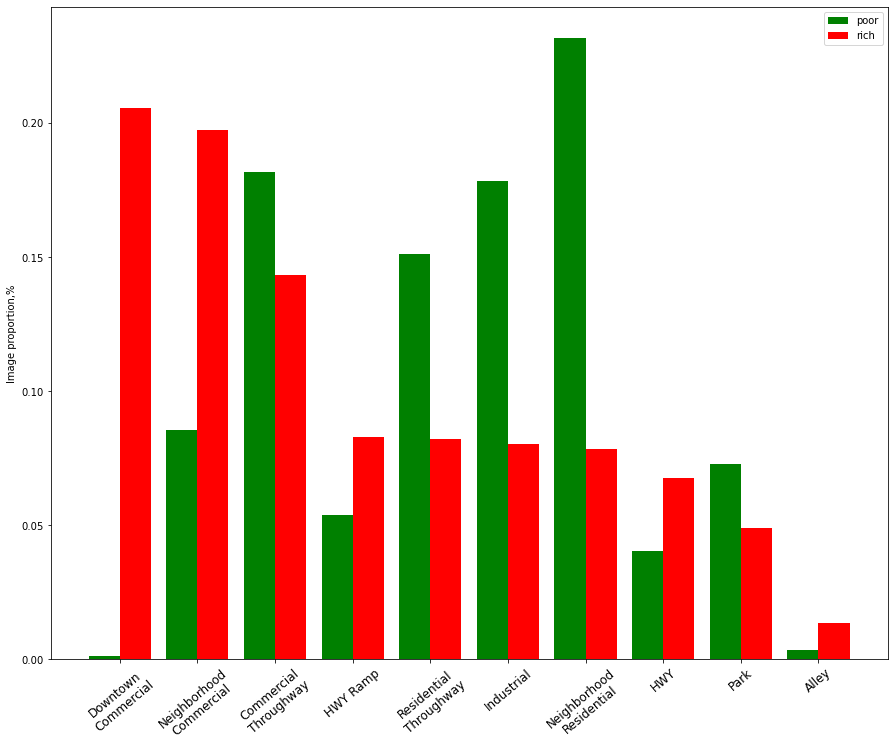

In [90]:
fig,ax=plt.subplots()
fig.set_size_inches((15,12))

labels=['Downtown\nCommercial', 'Neighborhood\nCommercial',
       'Commercial\nThroughway', 'HWY Ramp', 'Residential\nThroughway',
       'Industrial', 'Neighborhood\nResidential', 'HWY', 'Park', 'Alley']

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars


rects1=ax.bar(x - width/2,poorDist,color='g',label='poor',width=width)
rects2=ax.bar(x + width/2,richDist,color='r',label='rich',width=width)


ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12, rotation=40)


ax.set_ylabel('Image proportion,%')
ax.legend()



In [91]:
[rect.get_height() for rect in rects1]

[0.0013114754098360656,
 0.08557377049180327,
 0.18163934426229508,
 0.05377049180327869,
 0.15114754098360655,
 0.17836065573770493,
 0.2318032786885246,
 0.040327868852459016,
 0.07278688524590164,
 0.003278688524590164]

In [92]:
poorImgs.to_csv(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston\Images\poorImgs.csv')
richImgs.to_csv(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston\Images\richImgs.csv')

In [332]:
poorImgs.to_pickle(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston\Images\poorImgs.pkl')

In [330]:
richImgs.to_pickle(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston\Images\richImgs.pkl')

In [231]:
import glob
import matplotlib.image as mpimg
%matplotlib inline


In [259]:
import shutil
import os

In [260]:
for src in richImgs.path:
    img_type=src.split('\\')[-2]
    name=src.split('\\')[-1]
    dst_folder='D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\Images\\rich\\'+img_type
    
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    dst='D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\Images\\rich\\'+img_type+'\\'+name
    shutil.copy(src,dst)

In [261]:
for src in poorImgs.path:
    img_type=src.split('\\')[-2]
    name=src.split('\\')[-1]
    dst_folder='D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\Images\\poor\\'+img_type
    
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    dst=dst_folder+'\\'+name
    shutil.copy(src,dst)